In [4]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 21.9 MB 139 kB/s
     |████████████████████████████████| 102 kB 5.3 MB/s 
     |████████████████████████████████| 690 kB 31.9 MB/s 
     |████████████████████████████████| 4.7 MB 61.9 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 296 kB 75.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=9b29309eae53f9391191f90db5673f1aa84ac7076c50e5880ad7340fdaa814f0
  Stored in directory: /tmp/pip-ephem-wheel-cache-zbn8g9uh/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=f3157a82317118fdc580e4baea222c241d23fdcd7206a69d8a9c1aadc8ef06bc
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built pandas-pro

**Importando as bibliotecas necessárias**


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
import plotly.express as px

<h2>Dicionário de Dados</h2>
<h3>Características - Potabilidade da Água</h3>

*   **PH (Variável Quantitativa Contínua)** O pH é um parâmetro importante na avaliação do equilíbrio ácido-base da água. É também o indicador da condição ácida ou alcalina do estado da água. 
*   **DUREZA (Variável Quantitativa Contínua)** A dureza da água é a propriedade relacionada com a concentração de íons de determinados minerais dissolvidos nesta substância ou mais especificamente as águas duras contém sais de cálcio e de magnésio em concentrações relativamente elevadas. A dureza da água é predominantemente causada pela presença de sais de cálcio e magnésio, de modo que os principais íons levados em consideração são os de cálcio (Ca2+) e magnésio (Mg2+). Eventualmente também o zinco, estrôncio, ferro ou alumínio podem ser levados em conta na aferição da dureza. 
*   **SOLIDOS - Total de Sólidos Dissolvidos - TDS - (Variável Quantitativa Contínua):** A água tem a capacidade de dissolver uma ampla gama de minerais ou sais inorgânicos e alguns orgânicos, como potássio, cálcio, sódio, bicarbonatos, cloretos, magnésio, sulfatos, etc. Esses minerais produzem sabor indesejado e alteram a aparência da água.
*   **CLORAMINA (Variável Quantitativa Contínua)** Cloro e cloramina são os principais desinfetantes usados em sistemas públicos de água. As cloraminas são mais comumente formadas quando a amônia é adicionada ao cloro para tratar a água potável.
*   **SULFATOS (Variável Quantitativa Contínua)** Os sulfatos são substâncias naturais encontradas em minerais, solo e rochas. Eles estão presentes no ar ambiente, águas subterrâneas, plantas e alimentos.
*   **CONDUTIVIDADE (Variável Quantitativa Contínua)** A água pura não é um bom condutor de corrente elétrica, mas um bom isolante. O aumento da concentração de íons aumenta a condutividade elétrica da água. Geralmente, a quantidade de sólidos dissolvidos na água determina a condutividade elétrica. A condutividade elétrica (EC) realmente mede o processo iônico de uma solução que lhe permite transmitir corrente.
*   **CARBONO_ORGANICO (Variável Quantitativa Contínua)** O Carbono Orgânico Total (TOC) nas águas de nascente vem de matéria orgânica natural em decomposição, bem como de fontes sintéticas. TOC é uma medida da quantidade total de carbono em compostos orgânicos em água pura
*   **TRIALOMETANOS (Variável Quantitativa Contínua)** THMs são produtos químicos que podem ser encontrados em água tratada com cloro. A concentração de THMs na água potável varia de acordo com o nível de matéria orgânica na água, a quantidade de cloro necessária para tratar a água e a temperatura da água que está sendo tratada.
*   **TURBIDEZ (Variável Quantitativa Contínua)** A turbidez é um parâmetro físico que mede a propriedade óptica de absorção e reflexão da luz. Ele funciona como um importante parâmetro das condições adequadas para consumo da água. Essa característica é avaliada pela quantidade de partículas em suspensão, que interferem na propagação da luz pela água.
*   **POTABILIDADE (Variável Qualitativa Nominal)** Indica se a água é segura para consumo humano onde 1 significa Potável e 0 significa Não potável.

**Leitura dos Dados**

In [6]:
SEED = 42
np.random.seed(SEED)
warnings.filterwarnings(action='once')

dfAgua = pd.read_csv('https://raw.githubusercontent.com/inf032/introducaoML/master/data/potabilidade_agua.csv')
dfAgua.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

**Alterando os nomes das colunas**

In [7]:
dfAgua.columns = ['PH', 'DUREZA', 'SOLIDOS', 'CLORAMINA', 
                  'SULFATOS', 'CONDUTIVIDADE', 'CARBONO_ORGANICO',
                 'TRIALOMETANOS', 'TURBIDEZ', 'POTABILIDADE']
dfAgua.head()

,PH,DUREZA,SOLIDOS,CLORAMINA,SULFATOS,CONDUTIVIDADE,CARBONO_ORGANICO,TRIALOMETANOS,TURBIDEZ,POTABILIDADE
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [8]:
dfAgua.describe()

,PH,DUREZA,SOLIDOS,CLORAMINA,SULFATOS,CONDUTIVIDADE,CARBONO_ORGANICO,TRIALOMETANOS,TURBIDEZ,POTABILIDADE
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


**Plotando Percentual de Dados presentes/missings por feature**


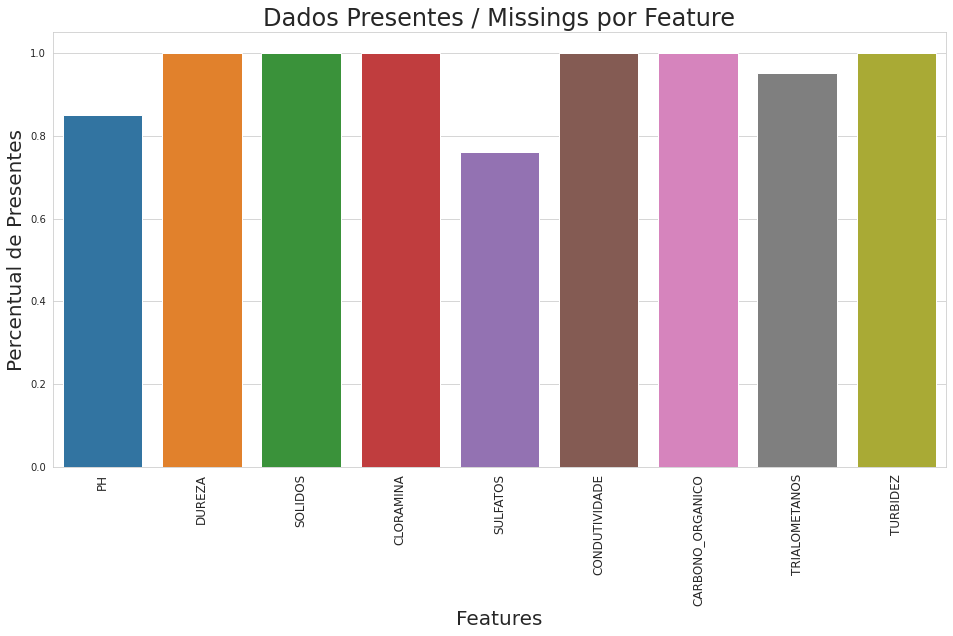

In [80]:
ausentes = (1 - X.isna()).mean()
dfAusentes = pd.DataFrame(ausentes, columns=['pct'])
dfAusentes['feature'] = X.columns
dfAusentes.index = range(dfAusentes.shape[0])
dfAusentes

fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
sns.barplot(data=dfAusentes, x='feature', y='pct', ax=ax)
ax.set_title('Dados Presentes / Missings por Feature', fontsize = 24)
ax.set_ylabel('Percentual de Presentes', fontsize = 20)
ax.set_xlabel('Features', fontsize = 20)
ax.set_xticklabels(labels = dfAusentes.feature, rotation=90, fontsize = 12)
fig.show()

In [9]:
dfAgua.dtypes

PH                  float64
DUREZA              float64
SOLIDOS             float64
CLORAMINA           float64
SULFATOS            float64
CONDUTIVIDADE       float64
CARBONO_ORGANICO    float64
TRIALOMETANOS       float64
TURBIDEZ            float64
POTABILIDADE          int64
dtype: object

In [10]:
profile = ProfileReport(dfAgua, 'Relatório do DataFrame de Potabilidade')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
dfAgua.POTABILIDADE.value_counts(normalize = True)

0    0.60989
1    0.39011
Name: POTABILIDADE, dtype: float64

Text(0.5, 1.0, 'Divisão das Amostras entre Não Potáveis / Potáveis')

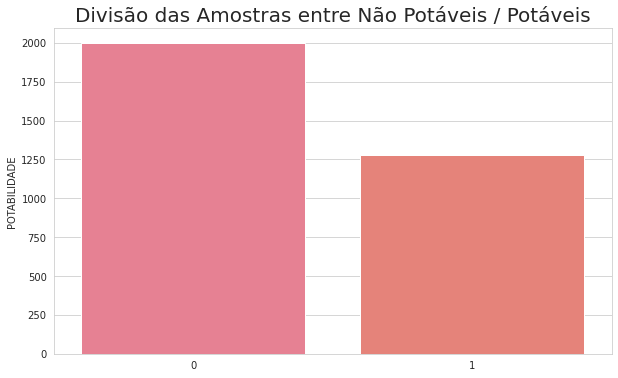

In [12]:
sns.set_style("whitegrid")
ax = sns.barplot(x=dfAgua.POTABILIDADE.unique(), y = dfAgua.POTABILIDADE.value_counts(), palette=sns.color_palette("husl", n_colors=30))
ax.figure.set_size_inches(10,6)
ax.set_title('Divisão das Amostras entre Não Potáveis / Potáveis', fontsize = 20)


In [13]:
preditoras = ['PH', 'DUREZA', 'SOLIDOS', 'CLORAMINA', 'SULFATOS', 'CONDUTIVIDADE', 'CARBONO_ORGANICO', 'TRIALOMETANOS', 'TURBIDEZ']
preditoras_desc = ['pH', 'Dureza', 'Sólidos', 'Cloramina', 'Sulfatos', 'Condutividade', 'Carbono Orgânico', 'Trialometanos', 'Turbidez']
alvo = 'POTABILIDADE'
correlacao = dfAgua[preditoras].corr()
correlacao

,PH,DUREZA,SOLIDOS,CLORAMINA,SULFATOS,CONDUTIVIDADE,CARBONO_ORGANICO,TRIALOMETANOS,TURBIDEZ
PH,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057
DUREZA,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449
SOLIDOS,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546
CLORAMINA,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363
SULFATOS,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187
CONDUTIVIDADE,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798
CARBONO_ORGANICO,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308
TRIALOMETANOS,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145
TURBIDEZ,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000


In [14]:
fig = px.imshow(correlacao, labels=dict(x="Variáveis Preditoras", y="Variáveis Preditoras", color="Correlação de Pearson"),
                x=preditoras_desc, y=preditoras_desc, title="Correlação das Variáveis Preditoras")
fig.update_layout(
    font_family="Verdana",
    font_color="blue",
    title_font_family="Verdana",
    title_font_color="black",
)
fig.update_xaxes(side="top")
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/express/_imshow.py:354: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if img.dtype == np.bool:


In [15]:
dfAgua.shape

(3276, 10)

**Holdout**

In [16]:
X = dfAgua[preditoras]
y = dfAgua[alvo]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

print(f'Treinaremos com {X_train.shape[0]} individuos e testaremos com {X_test.shape[0]} individuos')

Treinaremos com 2293 individuos e testaremos com 983 individuos


**Função de Resultados de Validação**

In [17]:
from sklearn.base import ClassifierMixin
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def report_validacao(nome_model: str, model : ClassifierMixin, X_train : pd.DataFrame, X_test : pd.DataFrame, y_train : pd.Series, y_test : pd.Series, printCM = False):
  model.fit(X_train, y_train)
  print(f'Resultados para o {nome_model}')
  print(f'Acurácia: {np.round(model.score(X_test, y_test) * 100, 2)}%')
  if(printCM) :
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, normalize='all')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
  return model  

**Definindo um Baseline**


Resultados para o Dummy Classifier
Acurácia: 50.46%


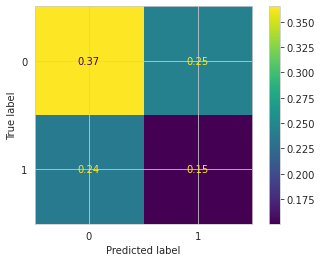

DummyClassifier(strategy='stratified')

In [18]:
from sklearn.dummy import DummyClassifier
report_validacao('Dummy Classifier', DummyClassifier(strategy='stratified'), X_train, X_test, y_train, y_test, printCM=True)

In [19]:
X_train.isna().sum() * 100  / X_train.shape[0]

PH                  15.002181
DUREZA               0.000000
SOLIDOS              0.000000
CLORAMINA            0.000000
SULFATOS            23.942433
CONDUTIVIDADE        0.000000
CARBONO_ORGANICO     0.000000
TRIALOMETANOS        5.058875
TURBIDEZ             0.000000
dtype: float64

**Imputar Valores**

In [17]:
from sklearn.impute import KNNImputer
from sklearn.impute._base import _BaseImputer

def buscar_colunas_nan(data : pd.DataFrame) :
  col_name = []
  for col in data.columns :
    if(X_train[col].isna().sum() > 0) :
      col_name.append(col)
  return col_name

def marcar_campos_imputados(data : pd.DataFrame) :
  colunas_nan = buscar_colunas_nan(data)
  data_modified = data.copy()
  for coluna_nan in colunas_nan :
    data_modified[f'{coluna_nan}_IMPUTED'] = data[coluna_nan].isna().astype(int)
  return data_modified

def imputar_valores_treino(data : pd.DataFrame):
  columns_original = data.columns
  colunas_nan = buscar_colunas_nan(data)
  data_modified = marcar_campos_imputados(data)
  imputer = KNNImputer(n_neighbors=3)
  imputed_data = imputer.fit_transform(data)
  df_imputed_data = pd.DataFrame(imputed_data, columns = columns_original)
  df_imputed_data.index = data.index
  for coluna_nan in colunas_nan :
    df_imputed_data[f'{coluna_nan}_IMPUTED'] = data_modified[f'{coluna_nan}_IMPUTED']
  return imputer, df_imputed_data

def imputar_valores_teste(data : pd.DataFrame, imputer : _BaseImputer):
  columns_original = data.columns
  colunas_nan = buscar_colunas_nan(data)
  data_modified = marcar_campos_imputados(data)
  imputed_data = imputer.transform(data)
  df_imputed_data = pd.DataFrame(imputed_data, columns = columns_original)
  df_imputed_data.index = data.index
  for coluna_nan in colunas_nan :
    df_imputed_data[f'{coluna_nan}_IMPUTED'] = data_modified[f'{coluna_nan}_IMPUTED']
  return df_imputed_data  




In [18]:
X_test.head()

,PH,DUREZA,SOLIDOS,CLORAMINA,SULFATOS,CONDUTIVIDADE,CARBONO_ORGANICO,TRIALOMETANOS,TURBIDEZ
2137,7.775050,195.178742,22329.740079,6.105130,416.949194,371.615860,10.964183,NaN,4.699483
775,NaN,205.088789,27064.418409,7.398379,304.926475,409.501842,18.521792,61.486105,4.599573
1820,6.643027,205.233119,20511.369240,5.908111,313.353813,455.693256,16.021941,52.153472,3.709989
26,3.445062,207.926260,33424.768678,8.782147,384.007006,441.785876,13.805902,30.284597,4.184397
1085,NaN,190.219168,23094.872394,6.481986,298.356157,414.889130,13.461794,50.895233,2.977047


In [19]:
imputer, X_train_mod = imputar_valores_treino(X_train)
X_test_mod = imputar_valores_teste(X_test, imputer)
X_test_mod.head()

,PH,DUREZA,SOLIDOS,CLORAMINA,SULFATOS,CONDUTIVIDADE,CARBONO_ORGANICO,TRIALOMETANOS,TURBIDEZ,PH_IMPUTED,SULFATOS_IMPUTED,TRIALOMETANOS_IMPUTED
2137,7.775050,195.178742,22329.740079,6.105130,416.949194,371.615860,10.964183,72.133566,4.699483,0,0,1
775,7.525491,205.088789,27064.418409,7.398379,304.926475,409.501842,18.521792,61.486105,4.599573,1,0,0
1820,6.643027,205.233119,20511.369240,5.908111,313.353813,455.693256,16.021941,52.153472,3.709989,0,0,0
26,3.445062,207.926260,33424.768678,8.782147,384.007006,441.785876,13.805902,30.284597,4.184397,0,0,0
1085,7.768651,190.219168,23094.872394,6.481986,298.356157,414.889130,13.461794,50.895233,2.977047,1,0,0


In [20]:
X_train_mod[['PH_IMPUTED', 'SULFATOS_IMPUTED', 'TRIALOMETANOS_IMPUTED']].mean() * 100

PH_IMPUTED               15.002181
SULFATOS_IMPUTED         23.942433
TRIALOMETANOS_IMPUTED     5.058875
dtype: float64

In [21]:
X_train_mod.isna().sum()

PH                       0
DUREZA                   0
SOLIDOS                  0
CLORAMINA                0
SULFATOS                 0
CONDUTIVIDADE            0
CARBONO_ORGANICO         0
TRIALOMETANOS            0
TURBIDEZ                 0
PH_IMPUTED               0
SULFATOS_IMPUTED         0
TRIALOMETANOS_IMPUTED    0
dtype: int64

Resultados para o Decision Tree Classifier
Acurácia: 57.07%


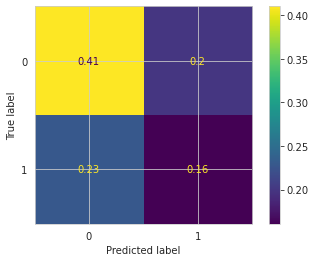

DecisionTreeClassifier()

In [22]:
from sklearn.tree import DecisionTreeClassifier
report_validacao('Decision Tree Classifier', DecisionTreeClassifier(), X_train_mod, X_test_mod, y_train, y_test, printCM=True)


**Pre-Processamento: 'Escalando' os dados**

In [23]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(X=X_train_mod)
X_train_std = pd.DataFrame(data=ss.transform(X=X_train_mod), columns= X_train_mod.columns)
X_train_std.index = X_train_mod.index 
X_test_std = pd.DataFrame(ss.transform(X=X_test_mod), columns= X_test_mod.columns)
X_test_std.index = X_test_mod.index
X_train_std

,PH,DUREZA,SOLIDOS,CLORAMINA,SULFATOS,CONDUTIVIDADE,CARBONO_ORGANICO,TRIALOMETANOS,TURBIDEZ,PH_IMPUTED,SULFATOS_IMPUTED,TRIALOMETANOS_IMPUTED
2018,0.137211,1.237015,1.550126,0.324340,1.232236,-0.776008,-0.247820,-2.054621,-0.185324,2.380273,-0.561065,-0.230834
2740,-0.195178,0.017734,0.081184,-1.202600,1.718502,-0.067932,0.505598,-1.143123,0.692067,-0.420120,-0.561065,-0.230834
2746,-0.953438,-1.151796,0.622491,-0.111131,-0.135212,-1.357775,-0.199626,-1.872555,-1.232364,-0.420120,-0.561065,-0.230834
1468,-0.530591,-0.638412,-1.164521,-0.023118,0.770815,0.028698,0.431619,1.298302,-0.885252,-0.420120,1.782326,-0.230834
1417,-0.251960,-0.447205,0.284818,-0.054383,0.188891,0.635287,1.781942,-0.766460,0.323551,-0.420120,-0.561065,-0.230834
...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.172491,0.813496,-1.171744,1.116818,0.467564,0.815493,1.187441,0.478015,1.163680,-0.420120,1.782326,-0.230834
1734,-2.077029,-0.154935,-0.510590,0.370926,-0.720156,-0.270021,-1.433374,-1.297460,1.393805,-0.420120,-0.561065,-0.230834
394,1.085066,-0.062634,0.281038,1.095626,-0.132684,-1.163126,0.689041,0.071477,-0.215785,-0.420120,-0.561065,-0.230834
2242,-0.289995,-0.810680,0.184120,-0.019019,-0.231152,1.052216,1.835796,0.804085,0.255488,-0.420120,1.782326,-0.230834


In [24]:
from sklearn.svm import SVC
report_validacao('SVC', SVC(), X_train_mod, X_test_mod, y_train, y_test, printCM=False)
report_validacao('SVC - Escalado', SVC(), X_train_std, X_test_std, y_train, y_test, printCM=False)

Resultados para o SVC
Acurácia: 61.04%
Resultados para o SVC - Escalado
Acurácia: 66.73%


SVC()

**Comparando Diversos Modelos**

In [25]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


models = {'Dummy Classifier': DummyClassifier(), 'KNN' : KNeighborsClassifier(), 'SVC' : SVC(), 'Ada Boost' : AdaBoostClassifier(), 'Gradient Boost' : GradientBoostingClassifier(),
         'Decision Tree' : DecisionTreeClassifier(), 'Gaussian Naive Bayes' : GaussianNB(), 'Random Forest' : RandomForestClassifier()}

for model in models :
    report_validacao(model, models[model], X_train_std, X_test_std, y_train, y_test)


Resultados para o Dummy Classifier
Acurácia: 61.04%
Resultados para o KNN
Acurácia: 60.83%
Resultados para o SVC
Acurácia: 66.73%
Resultados para o Ada Boost
Acurácia: 61.85%
Resultados para o Gradient Boost
Acurácia: 65.01%
Resultados para o Decision Tree
Acurácia: 59.72%
Resultados para o Gaussian Naive Bayes
Acurácia: 61.44%
Resultados para o Random Forest
Acurácia: 66.63%


In [26]:
for i in range(10) :
  report_validacao('Decision Tree Classifier', DecisionTreeClassifier(), X_train_std, X_test_std, y_train, y_test, printCM=False)

Resultados para o Decision Tree Classifier
Acurácia: 59.51%
Resultados para o Decision Tree Classifier
Acurácia: 59.0%
Resultados para o Decision Tree Classifier
Acurácia: 59.82%
Resultados para o Decision Tree Classifier
Acurácia: 57.48%
Resultados para o Decision Tree Classifier
Acurácia: 58.09%
Resultados para o Decision Tree Classifier
Acurácia: 59.31%
Resultados para o Decision Tree Classifier
Acurácia: 59.51%
Resultados para o Decision Tree Classifier
Acurácia: 60.12%
Resultados para o Decision Tree Classifier
Acurácia: 59.1%
Resultados para o Decision Tree Classifier
Acurácia: 58.9%


In [27]:
def report_media(results : dict):
  media = results['test_score'].mean()
  desvio_padrao = results['test_score'].std()
  print(f'Acurácia: Média: {np.round(media * 100, 2)}% .. Intervalo: [{np.round((media - 2*desvio_padrao) * 100, 2)}%, {np.round((media + 2*desvio_padrao) * 100, 2)}%]')

**Realizando Validação Cruzada para lidar com Aleatoriedade**

In [28]:
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold

SPLITS = 10

_, X_cv = imputar_valores_treino(X)
folder = StratifiedKFold(n_splits=SPLITS, shuffle=True)
modelo = DecisionTreeClassifier()
results = cross_validate(modelo, X_cv, y, cv = folder, return_train_score=False)
report_media(results)

Acurácia: Média: 58.21% .. Intervalo: [54.78%, 61.64%]


**Usando Pipeline para Garantir que as transformações sejam usadas apenas nos treinos**

In [29]:
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
imputer = KNNImputer()
modelo = SVC()

pipeline_modelo = Pipeline([('imputar', imputer), ('escalar', scaler), ('modelo', modelo)])

folder = StratifiedKFold(n_splits=SPLITS, shuffle=True)
results = cross_validate(pipeline_modelo, X, y, cv = folder, return_train_score=False)
report_media(results)

Acurácia: Média: 67.7% .. Intervalo: [63.87%, 71.53%]


**Otimização de Modelo**

In [30]:
SPLITS = 10

folder = StratifiedKFold(n_splits=SPLITS, shuffle=True)
imputer = KNNImputer()
scaler = StandardScaler()
modelo = DecisionTreeClassifier()

pipeline_modelo = Pipeline([('imputar', imputer), ('escalar', scaler), ('modelo', modelo)])
results = cross_validate(pipeline_modelo, X, y, cv = folder, return_train_score=False)
report_media(results)

Acurácia: Média: 59.77% .. Intervalo: [54.22%, 65.31%]


Resultados para o Decision Tree Classifier (Pronfudidade: 2)
Acurácia: 62.67%


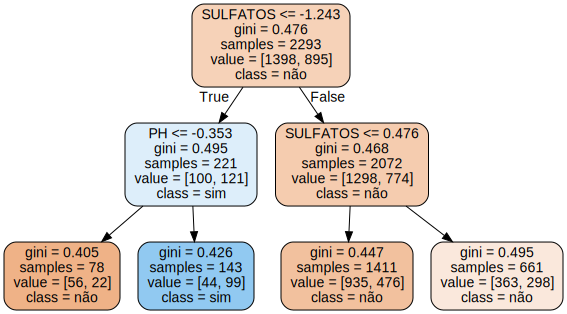

In [31]:
from sklearn.tree import export_graphviz
import graphviz

PROFUNDIDADE = 2

tree = report_validacao(f'Decision Tree Classifier (Pronfudidade: {PROFUNDIDADE})',
                        DecisionTreeClassifier(max_depth=PROFUNDIDADE), 
                        X_train_std, X_test_std, y_train, y_test)


features = X_train_std.columns
dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True, 
                class_names=["não", "sim"], feature_names =  features)

graph = graphviz.Source(dot_data)
graph

In [41]:
for profundidade in range(1, 20) :
  results = cross_validate(DecisionTreeClassifier(max_depth=profundidade), 
                              X_cv, y, cv = 5, return_train_score=False)
  report_media(results)  


Acurácia: Média: 61.51% .. Intervalo: [58.01%, 65.01%]
Acurácia: Média: 60.81% .. Intervalo: [58.23%, 63.39%]
Acurácia: Média: 62.85% .. Intervalo: [60.78%, 64.93%]
Acurácia: Média: 61.57% .. Intervalo: [58.17%, 64.97%]
Acurácia: Média: 61.91% .. Intervalo: [57.64%, 66.17%]
Acurácia: Média: 61.81% .. Intervalo: [58.02%, 65.6%]
Acurácia: Média: 60.68% .. Intervalo: [54.71%, 66.66%]
Acurácia: Média: 60.2% .. Intervalo: [55.8%, 64.59%]
Acurácia: Média: 59.92% .. Intervalo: [55.44%, 64.41%]
Acurácia: Média: 60.44% .. Intervalo: [56.52%, 64.36%]
Acurácia: Média: 59.77% .. Intervalo: [56.42%, 63.12%]
Acurácia: Média: 59.65% .. Intervalo: [57.08%, 62.21%]
Acurácia: Média: 57.42% .. Intervalo: [54.38%, 60.45%]
Acurácia: Média: 57.27% .. Intervalo: [55.06%, 59.47%]
Acurácia: Média: 57.36% .. Intervalo: [53.66%, 61.05%]
Acurácia: Média: 56.23% .. Intervalo: [53.79%, 58.67%]
Acurácia: Média: 56.29% .. Intervalo: [54.09%, 58.49%]
Acurácia: Média: 56.44% .. Intervalo: [53.74%, 59.14%]
Acurácia: Méd